Chapter 13: Statistics

In [1]:
!pip install statsmodels

In [2]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [3]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    Parameters
    ==========
    S0: float
    initial stock/index value
    r: float
    constant short rate
    sigma: float
    constant volatility
    T: float
    final time horizon
    M: int
    number of time steps/intervals
    I: int
    number of paths to be simulated
    Returns
    =======
    paths: ndarray, shape (M + 1, I)
    simulated paths given the parameters
    '''
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std() #Matching first and second moment
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * rand)         #Vectorized Euler discretization of geometric Brownian motion.
    return paths

In [5]:
S0 = 100. # Initial value for simulated processe
r = 0.05 # Constant short rate
sigma = 0.2 # Constant volatility factor
T = 1.0 # Time horizon in year fractions
M = 50 # Number of time intervals
I = 250000 # Number of simulated processes
np.random.seed(1000)

In [6]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [7]:
S0 * math.exp(r * T) # Expected value and average simulated value

105.12710963760242

In [8]:
paths[-1].mean()

np.float64(105.12645392478754)

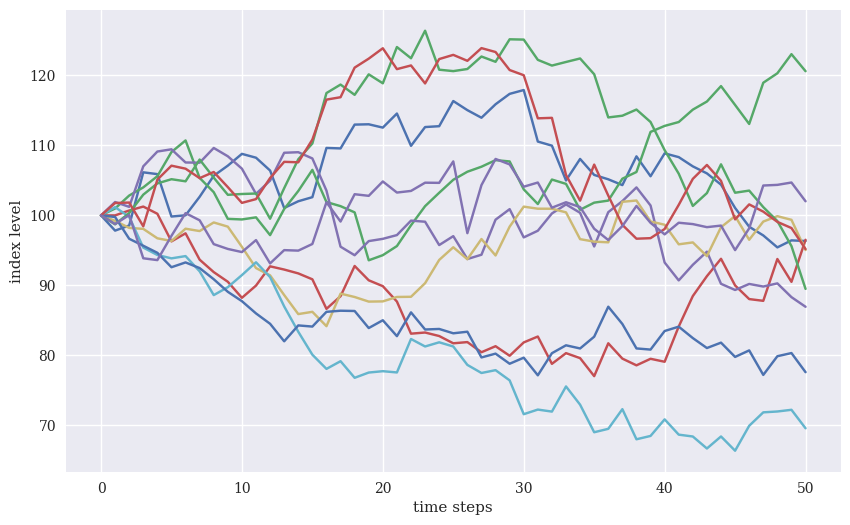

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');

Figure 13-1. Ten simulated paths of geometric Brownian motion

In [10]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [11]:
log_returns = np.log(paths[1:]/paths[:-1])

In [12]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [13]:
def print_statistics(array):
    ''' Prints selected statistics.
Parameters
==========
array: ndarray
object to generate statistics on
'''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [14]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [15]:
# Annealized mean log return after correction for the Ito term
log_returns.mean()*M + 0.5*sigma**2

np.float64(0.05000000000000004)

In [16]:
# Annualized volatility; i.e., annualized standard deviation of log returns
log_returns.std()*math.sqrt(M)

np.float64(0.2)

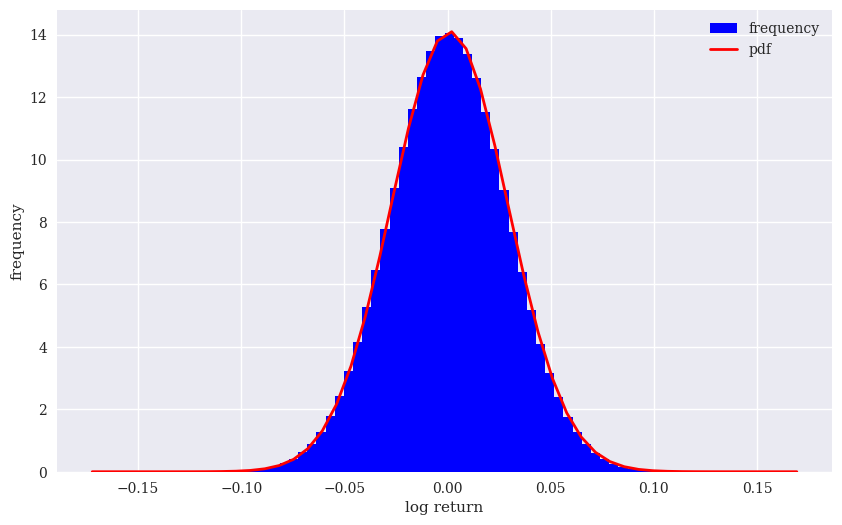

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,
label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),'r', lw=2.0, label='pdf')
plt.legend();

Figure 13-2. Histogram of log returns of geometric Brownina motion and normal density function.

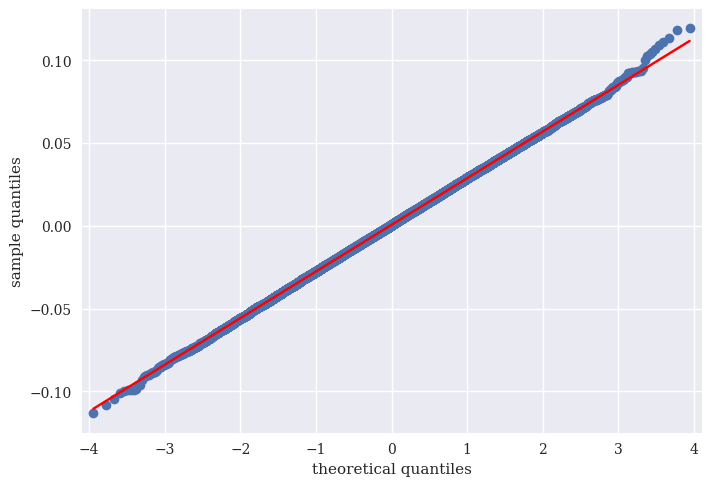

In [18]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

Figure 13-3. Quantile-quantile plot for log returns of geometric Brownian motion

In [19]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
Parameters
==========
array: ndarray
object to generate statistics on
'''
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [20]:
normality_tests(log_returns.flatten())
# All p values are well above 0.05.

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Text(0.5, 1.0, 'log data')

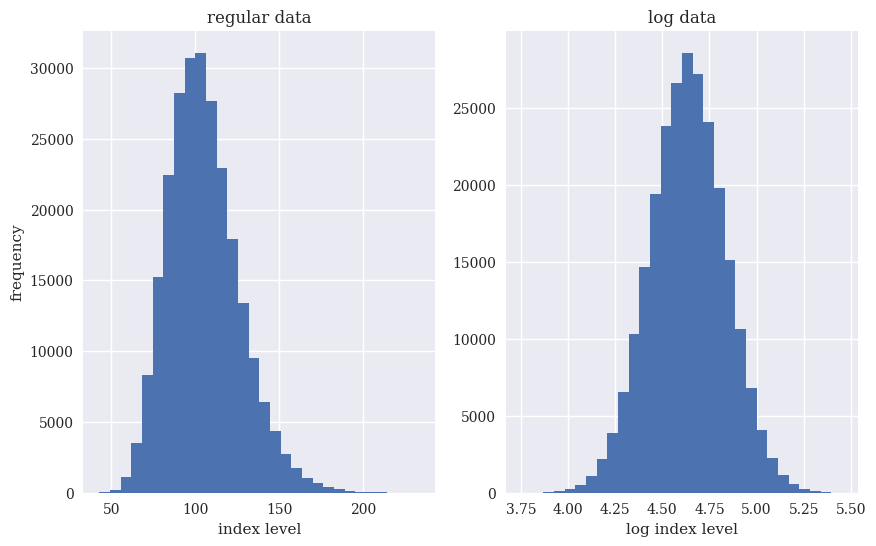

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

Figure 13-4. Histogram of simulated end-of-period index levels for geometric Brownian motion

In [22]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [23]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [24]:
normality_tests(np.log(paths[-1]))

Skew of data set         -0.001
Skew test p-value          0.851
Kurt of data set         -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


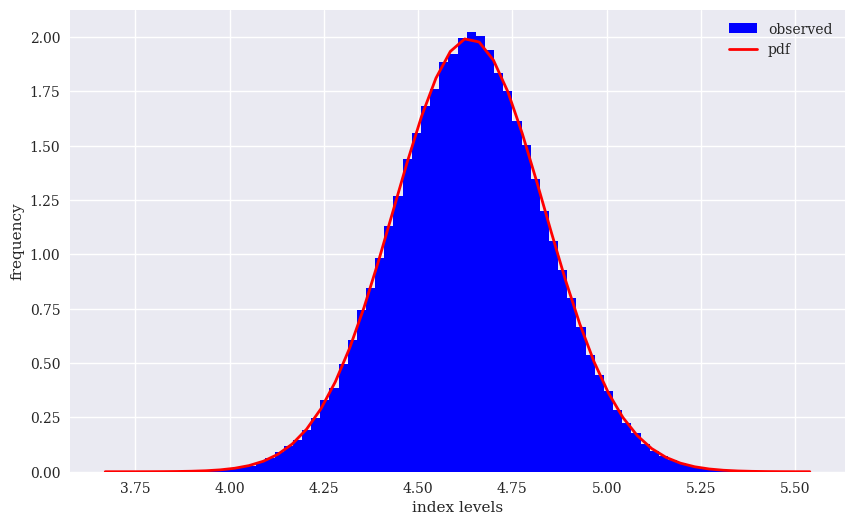

In [25]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True,
label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
'r', lw=2.0, label='pdf')
plt.legend();

Figure 13-5. Histogram of log index levels of geometric Brownian motion and normal density function

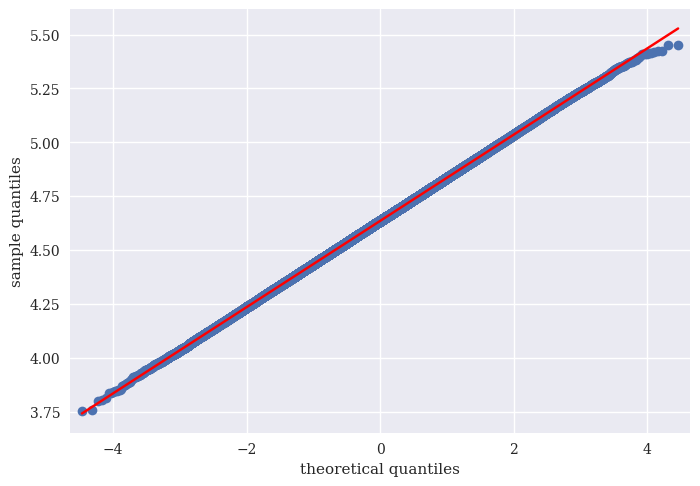

In [26]:
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

Figure 13-6. Quantile-quantile plot for log index levels of geometric Brownian motion

In [27]:
import pandas as pd

In [28]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [29]:
symbols = ['SPY', 'GLD','AAPL.O','MSFT.O']

In [30]:
data=raw[symbols]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2138 non-null   float64
 1   GLD     2138 non-null   float64
 2   AAPL.O  2138 non-null   float64
 3   MSFT.O  2138 non-null   float64
dtypes: float64(4)
memory usage: 83.5 KB


In [32]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


<Axes: xlabel='Date'>

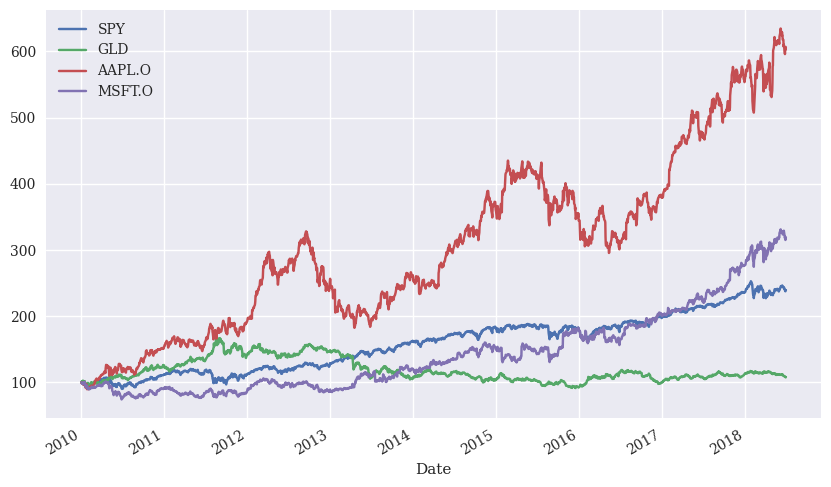

In [33]:
(data/data.iloc[0]*100).plot(figsize=(10,6))

Figure 13-7. Normalized prices of financial instruments over time


In [34]:
log_returns = np.log(data/data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

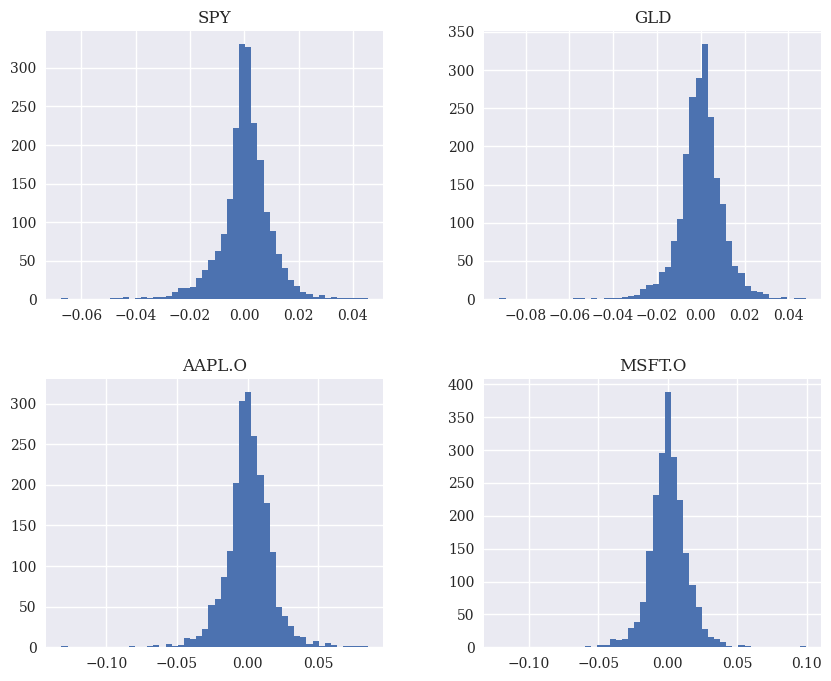

In [35]:
log_returns.hist(bins=50, figsize=(10,8))

13-8. Histograms of log returns for financial instruments

In [36]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30*'-/')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/
     statistic           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00933
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/
     statistic           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.01020
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/
     statistic           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.0008

Text(0, 0.5, 'sample quantiles')

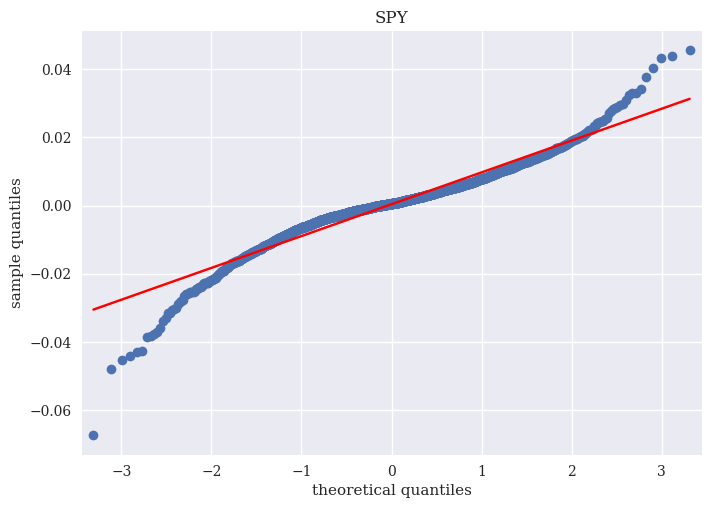

In [37]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Figure 13-9. Quantile-quantile plot for SPY log returns


Text(0, 0.5, 'sample quantiles')

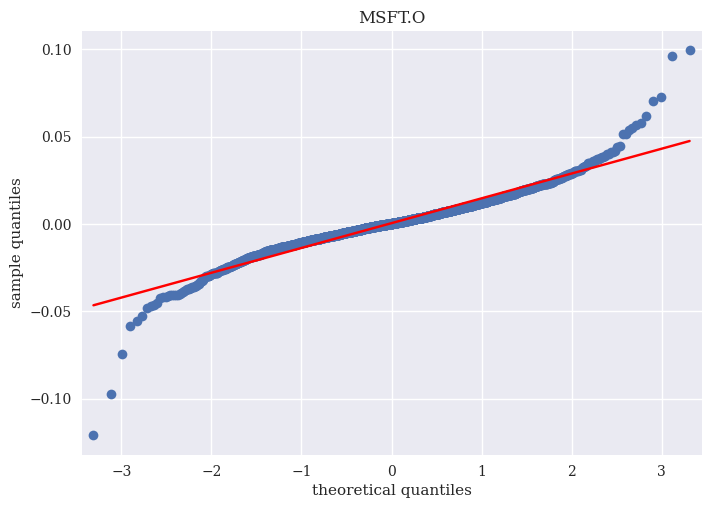

In [38]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.title('MSFT.O')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Figure 13-10. Quantile-quantile plot for MSFT.O log returns

In [39]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32*'-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data) # Normality test results for the times series of the financial instruments.
    


Results for symbol SPY
--------------------------------
Skew of data set         -0.522
Skew test p-value          0.000
Kurt of data set          4.524
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set         -0.599
Skew test p-value          0.000
Kurt of data set          5.684
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set         -0.235
Skew test p-value          0.000
Kurt of data set          4.790
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set         -0.091
Skew test p-value          0.085
Kurt of data set          7.291
Kurt test p-value          0.000
Norm test p-value          0.000


In [40]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD'] 

In [41]:
noa = len(symbols)

In [42]:
data = raw[symbols]

In [43]:
rets = np.log(data / data.shift(1))

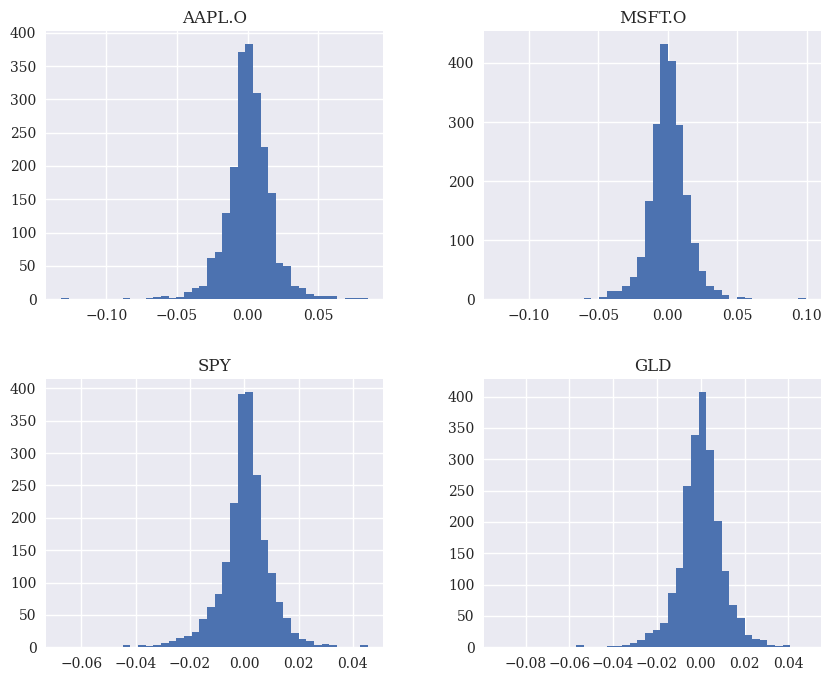

In [44]:
rets.hist(bins=40, figsize=(10, 8));

Figure 13-11. Histograms of log returns of financial instruments

In [45]:
rets.mean()*252
# Annualized mean returns

AAPL.O    0.212359
MSFT.O    0.136648
SPY       0.102928
GLD       0.009141
dtype: float64

In [46]:
rets.cov()*252
# annualized covariance matrix

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063773,0.023427,0.021039,0.001513
MSFT.O,0.023427,0.050917,0.022244,-0.000347
SPY,0.021039,0.022244,0.021939,0.000062
GLD,0.001513,-0.000347,0.000062,0.026209


In [47]:
weights = np.random.random(noa) # random portfolio weigths
weights /= np.sum(weights) # normalized to 1 or 100%

In [48]:
weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

In [49]:
weights.sum()

np.float64(1.0)

In [50]:
np.sum(rets.mean()*weights)*252
# Annealized portfolio return given the portfolio weights

np.float64(0.09179459482057789)

In [51]:
np.dot(weights.T, np.dot(rets.cov()*252, weights))
# Annualized protfolio variance given the portfolio weigths

np.float64(0.014763288666485568)

In [52]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights)))
# Annualized protfolio volatility given the portfolio weigths

0.1215042742724945

In [53]:
def port_ret(weights):
    return np.sum(rets.mean()*weights)*252

In [54]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights)))

In [55]:
prets = []
pvols = []
for p in range (2500): # MC simulation of portfolio wieghts
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights)) # collects the resulting statiscitcs in list ojbects
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols) 

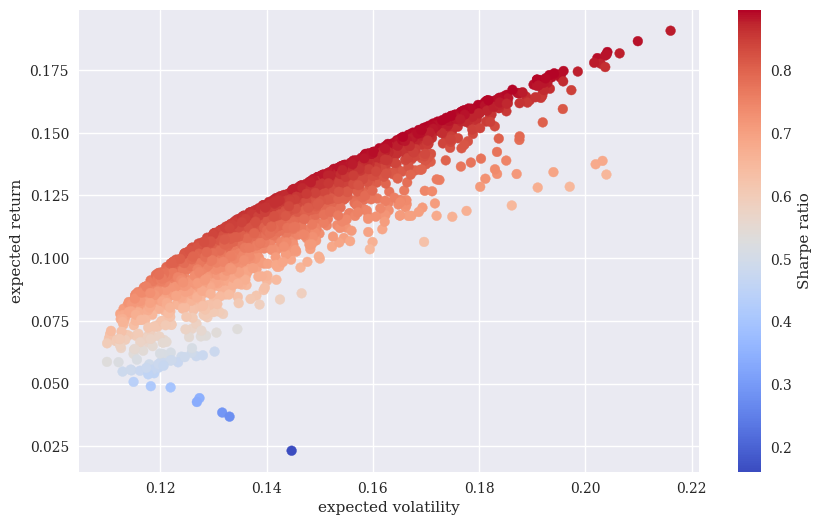

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

Figure 13-13. Expected return and volatility for random portfolio weights

In [57]:
import scipy.optimize as sco

In [58]:
def min_func_sharpe(weights): # Function to be minimized.
    return -port_ret(weights) / port_vol(weights)

In [59]:
cons = ({'type': 'eq', 'fun' :lambda x: np.sum(x) -1}) # Equality constraint.

In [60]:
bnds =tuple((0,1) for x in range(noa)) # Bounds for the parameters.

In [61]:
eweights = np.array(noa*[1./ noa,]) # Equal weights vector.
eweights

array([0.25, 0.25, 0.25, 0.25])

In [62]:
min_func_sharpe(eweights)

np.float64(-0.8436203363155398)

In [63]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons) #The optimization (i.e., minimization of function min_func_sharpe()).


CPU times: total: 15.6 ms
Wall time: 16.7 ms


In [64]:
opts #The results from the optimization.

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.8976673894051712
           x: [ 5.119e-01  1.913e-01  2.545e-01  4.228e-02]
         nit: 6
         jac: [ 8.968e-05  8.305e-05 -2.460e-04  1.928e-05]
        nfev: 30
        njev: 6
 multipliers: [-1.854e-05]

In [65]:
opts['x'].round(3) #The optimal portfolio weights.

array([0.512, 0.191, 0.255, 0.042])

In [66]:
port_ret(opts['x']).round(3) #The resulting portfolio return.

np.float64(0.161)

In [67]:
port_vol(opts['x']).round(3) #The resulting portfolio volatility.


np.float64(0.18)

In [68]:
port_ret(opts['x']) / port_vol(opts['x']) #The maximum Sharpe ratio.

np.float64(0.8976673894051712)

In [69]:
optv = sco.minimize(port_vol, eweights,
method='SLSQP', bounds=bnds,
constraints=cons) #The minimization of the portfolio volatility.


In [70]:
optv

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.10942155263406804
           x: [ 0.000e+00  1.062e-03  5.433e-01  4.557e-01]
         nit: 9
         jac: [ 1.110e-01  1.095e-01  1.094e-01  1.094e-01]
        nfev: 45
        njev: 9
 multipliers: [ 1.094e-01]

In [71]:
optv['x'].round(3)

array([0.   , 0.001, 0.543, 0.456])

In [72]:
port_vol(optv['x']).round(3)

np.float64(0.109)

In [73]:
port_ret(optv['x']).round(3)

np.float64(0.06)

In [74]:
port_ret(optv['x']) / port_vol(optv['x'])

np.float64(0.5504173674709628)

In [75]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
{'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#The two binding constraints for the efficient frontier.

In [76]:
bnds = tuple((0, 1) for x in weights)

In [77]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
        bounds=bnds, constraints=cons)  #The minimization of portfolio volatility for different target returns.
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: total: 812 ms
Wall time: 832 ms


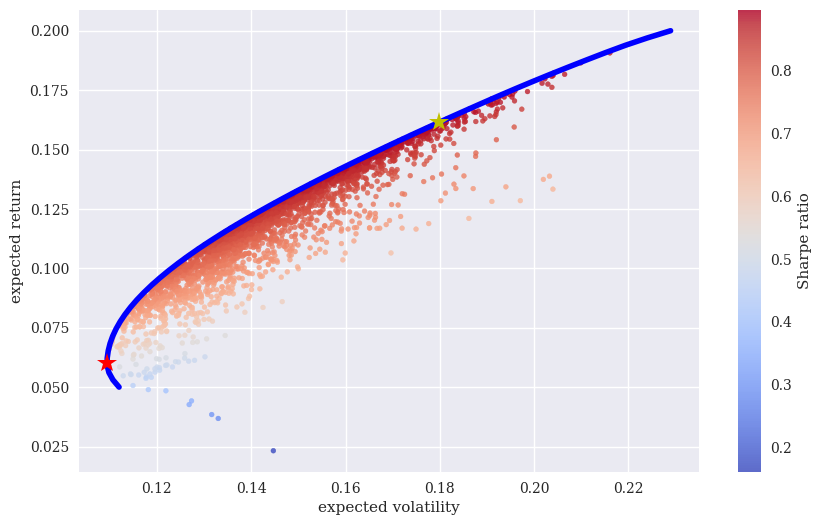

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

Figure 13-14. Minimum risk portfolios for given return levels (efficient frontier)

In [79]:
import scipy.interpolate as sci

In [80]:
ind = np.argmin(tvols) #Index position of minimum volatility portfolio.
evols = tvols[ind:] # RElevant portfolio volatility and return values
erets = trets[ind:] # Cubic splines interpolation on these values.

In [81]:
tck = sci.splrep(evols,erets)

In [82]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function '''
    return sci.splev(x, tck, der=1)

In [83]:
def equations(p, rf=0.01):  
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [84]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [85]:
opt

array([0.01      , 0.84470952, 0.19525392])

In [86]:
np.round(equations(opt),6)

array([ 0.,  0., -0.])

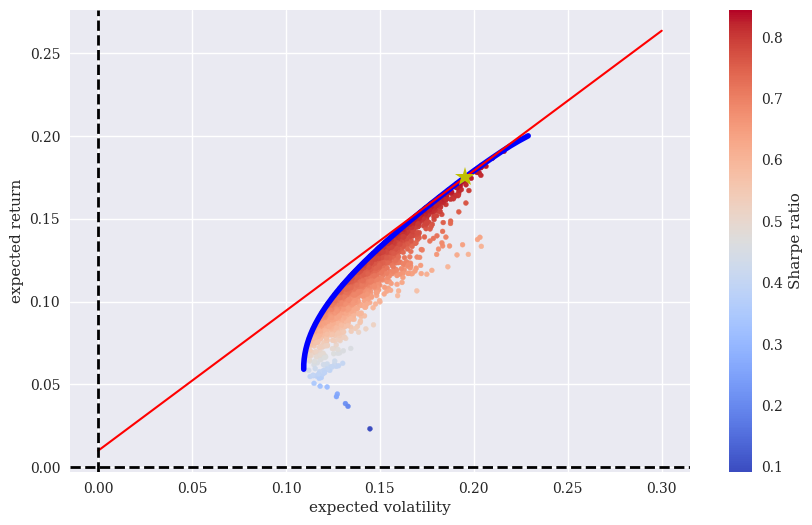

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

Figure 13-15. Capital market line and tangent portfolio (star) for risk-free rate of 1%

In [88]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
{'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
#Binding constraints for the tangent portfolio (gold star in Figure 13-15).
res = sco.minimize(port_vol, eweights, method='SLSQP',
bounds=bnds, constraints=cons)

In [89]:
res['x'].round(3)

array([0.59 , 0.221, 0.189, 0.   ])

In [90]:
port_ret(res['x'])

np.float64(0.17493284395277842)

In [91]:
port_vol(res['x'])

np.float64(0.19525372085424061)

In [92]:
port_ret(res['x']) / port_vol(res['x'])

np.float64(0.8959257892113002)

In [93]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [94]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%matplotlib inline

In [95]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

In [96]:
reg = np.polyfit(x, y, 1)

In [97]:
 reg

array([2.03384161, 3.77649234])

Text(0, 0.5, 'y')

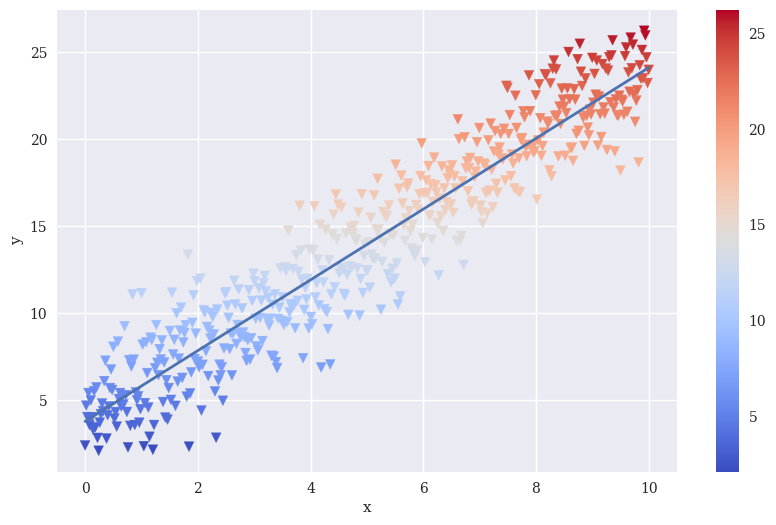

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

Figure 13-16. Sample data points and regression line


In [99]:
!pip install pymc

In [100]:
import pymc as pm

using pymc is dropped 

In [102]:
raw= pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [103]:
data = raw[['GDX', 'GLD']].dropna()

In [ ]:
data = data/data.iloc[0] # normalizing starting value of 1

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDX     2138 non-null   float64
 1   GLD     2138 non-null   float64
dtypes: float64(2)
memory usage: 50.1 KB


In [ ]:
data.iloc[-1]/ data.iloc[0]-1 # calculate relative performance

GDX   -0.532383
GLD    0.080601
dtype: float64

In [ ]:
data.corr() # calculated the correlation between the two instruments

,GDX,GLD
GDX,1.00000,0.71539
GLD,0.71539,1.00000


In [110]:
data.index[:3]

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [111]:
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())  
mpl_dates[:3]

array([14613., 14614., 14615.])

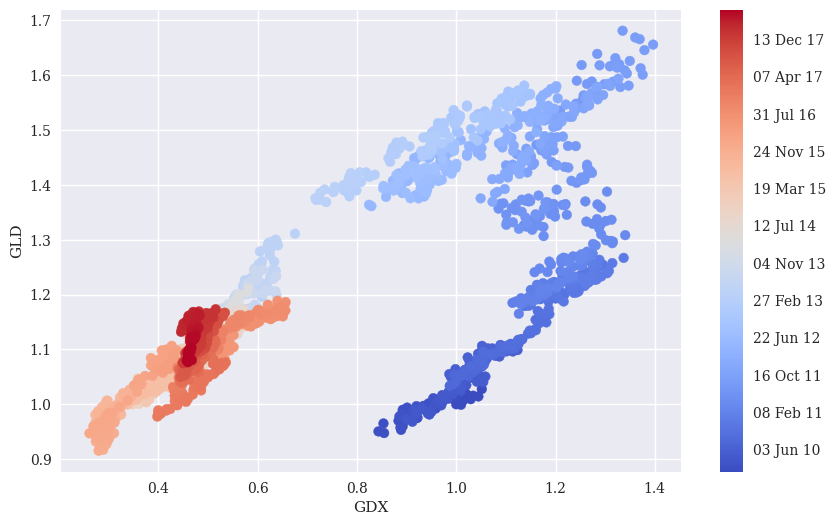

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates,
marker='o', cmap='coolwarm')
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
format=mpl.dates.DateFormatter('%d %b %y')); 

Figure 13-20. Scatter plot of GLD prices against GDX prices


using pymc failed due to error

In [117]:
from pymc.distributions.timeseries import GaussianRandomWalk

In [118]:
subsample_alpha = 50
subsample_beta = 50

In [121]:
model_randomwalk = pm.Model()
with model_randomwalk:
    sigma_alpha = pm.Exponential('sig_alpha', 1. / .02, initval=.1)  
    sigma_beta = pm.Exponential('sig_beta', 1. / .02, initval=.1)  
    alpha = GaussianRandomWalk('alpha', sigma_alpha ** -2,
    shape=int(len(data) / subsample_alpha))  
    beta = GaussianRandomWalk('beta', sigma_beta ** -2,
    shape=int(len(data) / subsample_beta))  
    alpha_r = np.repeat(alpha, subsample_alpha)  
    beta_r = np.repeat(beta, subsample_beta)  
    regression = alpha_r + beta_r * data['GDX'].values[:2100]  
    sd = pm.Uniform('sd', 0, 20)  
    likelihood = pm.Normal('GLD', mu=regression, sigma=sd,
    observed=data['GLD'].values[:2100]) 

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\pymc\distributions\timeseries.py:291: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\pymc\distributions\timeseries.py:291: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(


In [123]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [124]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

In [126]:
from sklearn.datasets import make_blobs

In [127]:
X, y = make_blobs(n_samples=250, centers=4, random_state=500, cluster_std=1.25)  

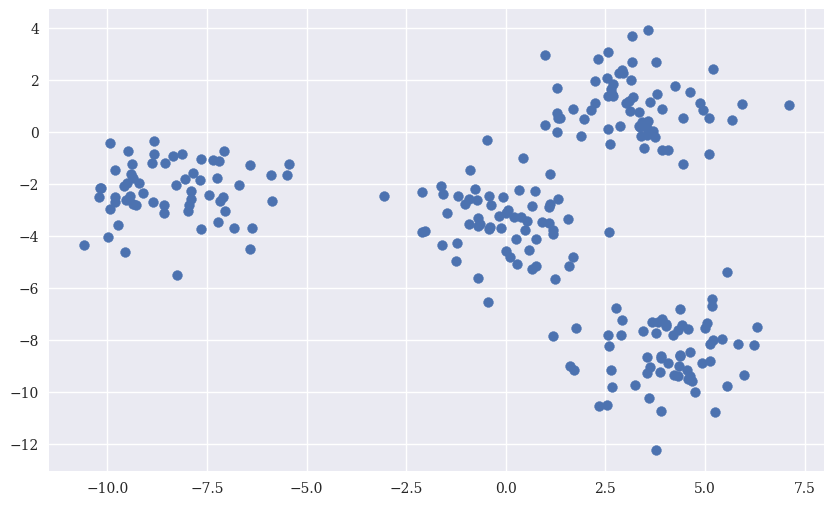

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50);

Figure 13-25. Sample data for the application of clustering algorithms


In [130]:
from sklearn.cluster import KMeans

In [131]:
model = KMeans(n_clusters=4, random_state=0)

In [132]:
model.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [133]:
y_kmeans = model.predict(X)

In [134]:
y_kmeans[:12]

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1], dtype=int32)

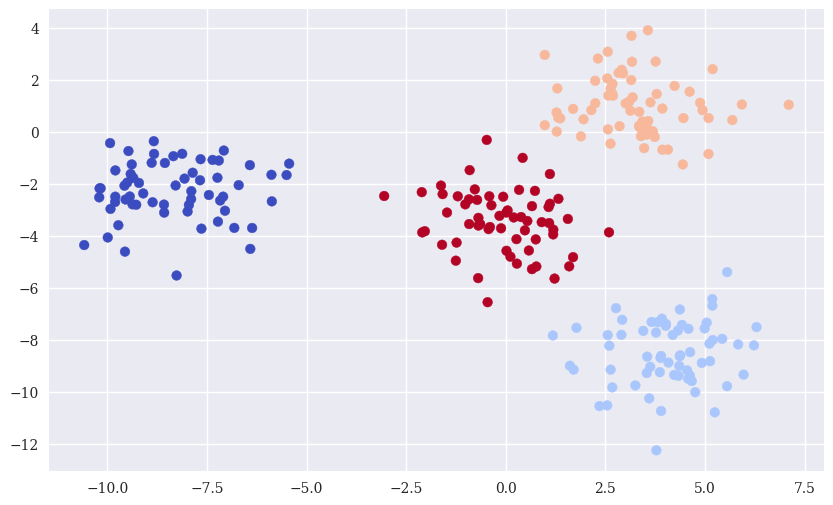

In [135]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='coolwarm')

Figure 13-25. sample data and identified clusters.


In [136]:
from sklearn.mixture import GaussianMixture

In [137]:
model = GaussianMixture(n_components=4, random_state=0)

In [138]:
model.fit(X)

,"n_components n_components: int, default=1The number of mixture components.",4
,"covariance_type covariance_type: {'full', 'tied', 'diag', 'spherical'}, default='full'String describing the type of covariance parameters to use.Must be one of:- 'full': each component has its own general covariance matrix.- 'tied': all components share the same general covariance matrix.- 'diag': each component has its own diagonal covariance matrix.- 'spherical': each component has its own single variance.For an example of using `covariance_type`, refer to:ref:`sphx_glr_auto_examples_mixture_plot_gmm_selection.py`.",'full'
,"tol tol: float, default=1e-3The convergence threshold. EM iterations will stop when thelower bound average gain is below this threshold.",0.001
,"reg_covar reg_covar: float, default=1e-6Non-negative regularization added to the diagonal of covariance.Allows to assure that the covariance matrices are all positive.",1e-06
,"max_iter max_iter: int, default=100The number of EM iterations to perform.",100
,"n_init n_init: int, default=1The number of initializations to perform. The best results are kept.",1
,"init_params init_params: {'kmeans', 'k-means++', 'random', 'random_from_data'}, default='kmeans'The method used to initialize the weights, the means and theprecisions.String must be one of:- 'kmeans' : responsibilities are initialized using kmeans.- 'k-means++' : use the k-means++ method to initialize.- 'random' : responsibilities are initialized randomly.- 'random_from_data' : initial means are randomly selected data points... versionchanged:: v1.1 `init_params` now accepts 'random_from_data' and 'k-means++' as initialization methods.",'kmeans'
,"weights_init weights_init: array-like of shape (n_components, ), default=NoneThe user-provided initial weights.If it is None, weights are initialized using the `init_params` method.",None
,"means_init means_init: array-like of shape (n_components, n_features), default=NoneThe user-provided initial means,If it is None, means are initialized using the `init_params` method.",None
,"precisions_init precisions_init: array-like, default=NoneThe user-provided initial precisions (inverse of the covariancematrices).If it is None, precisions are initialized using the 'init_params'method.The shape depends on 'covariance_type':: (n_components,) if 'spherical', (n_features, n_features) if 'tied', (n_components, n_features) if 'diag', (n_components, n_features, n_features) if 'full'",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given to the method chosen to initialize theparameters (see `init_params`).In addition, it controls the generation of random samples from thefitted distribution (see the method `sample`).Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",0


In [139]:
y_gm = model.predict(X)

In [140]:
y_gm[:12]

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1])

In [ ]:
(y_gm == y_kmeans).all()  
# The results from k-means clustering and Faussian mixture are the same.

np.True_

In [142]:
from sklearn.datasets import make_classification

In [143]:
n_samples = 100

In [144]:
X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, random_state=250)

In [145]:
X[:5]  

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [146]:
X.shape  

(100, 2)

In [147]:
y[:5]  

array([1, 0, 0, 1, 1])

In [148]:
y.shape  

(100,)

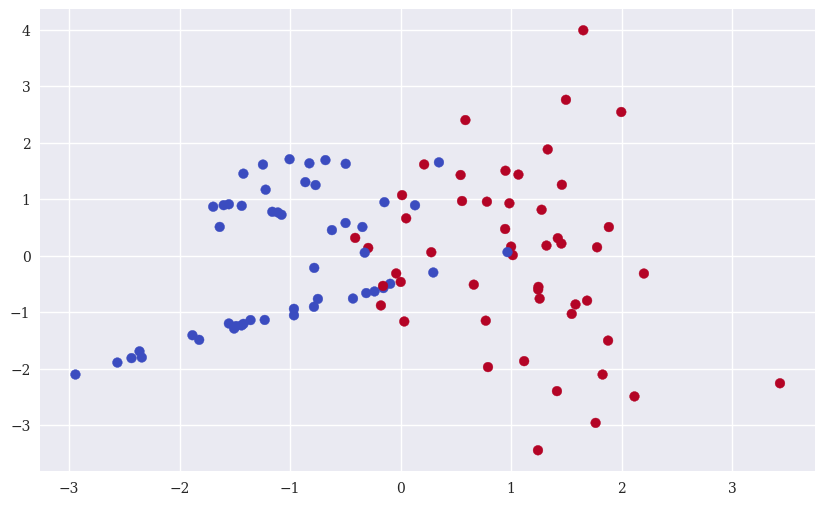

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm');

Figure 13-26. Sample data for the application of classification alforithms

In [150]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [151]:
model = GaussianNB()

In [152]:
model.fit(X, y)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [ ]:
model.predict_proba(X).round(4)[:5]  
#Shows the probabilities that the algorithm assigns to each class after fitting.


array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [ ]:
pred = model.predict(X)  #Based on the probabilities, predicts the binary classes for the data set

In [155]:
pred  

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [156]:
pred == y  

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [157]:
accuracy_score(y, pred)  

0.87

In [ ]:
Xc = X[y == pred]  #Selects the correct predictions and plots them.

Xf = X[y != pred]  #Selects the false predictions and plots them.

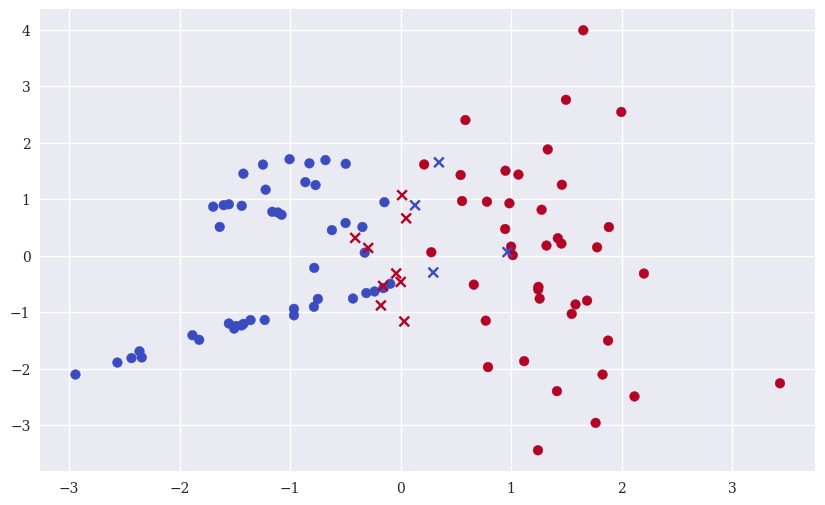

In [159]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')  
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');  

Figure 13-28. Correct (dots) and false predictions (crosses) from GNB

In [160]:

from sklearn.linear_model import LogisticRegression


In [162]:
model = LogisticRegression(C=1, solver='lbfgs')

In [163]:
model.fit(X, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [164]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7267, 0.2733],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4844, 0.5156]])

In [166]:
pred = model.predict(X)

In [167]:
accuracy_score(y, pred)

0.9

In [168]:
Xc = X[y == pred]
Xf = X[y != pred]

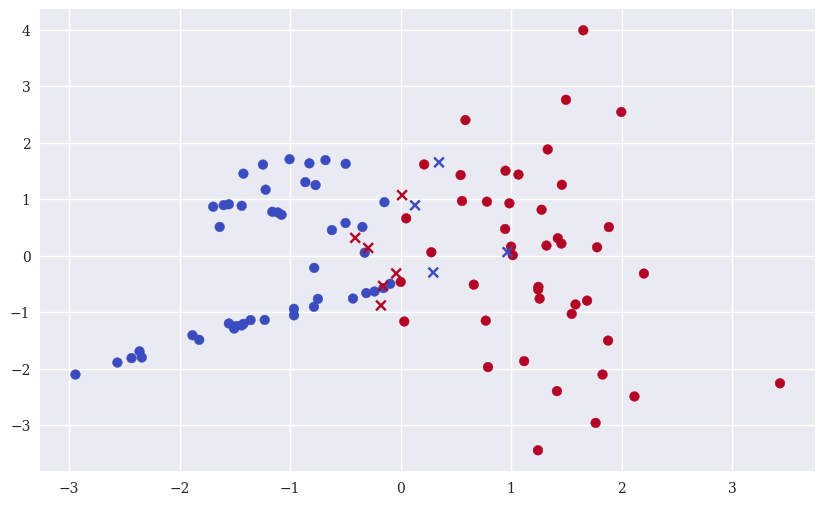

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');

Figure 13-29. Correct (dots) and false predictions (crosses) fromLogistic regression



In [171]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [172]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [174]:
pred = model.predict(X)
accuracy_score(y, pred)

0.92

In [175]:
Xc = X[y == pred]
Xf = X[y != pred]

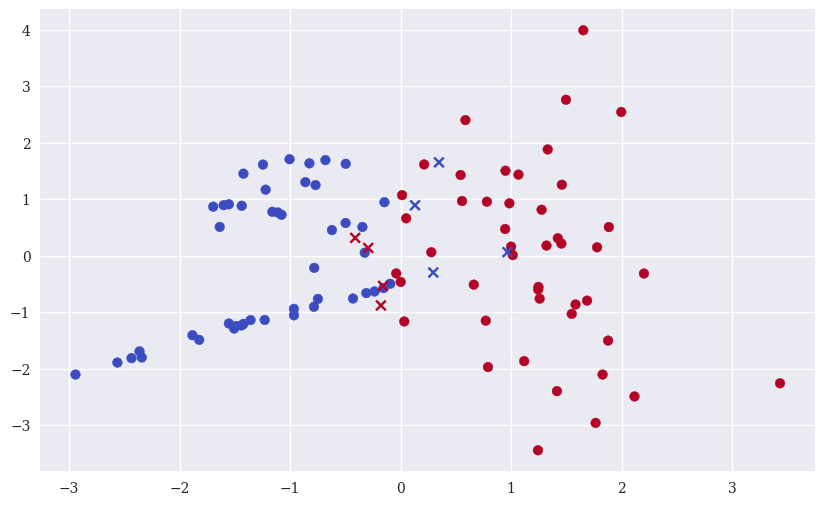

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');

Figure 13-29. Correct (dots) and false predictions (crosses) from DT (max_depth=1)


In [177]:
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    print('{:8d} | {:8.2f}'.format(depth, acc))

   depth | accuracy
--------------------
       1 |     0.92
       2 |     0.92
       3 |     0.94
       4 |     0.97
       5 |     0.99
       6 |     1.00


In [178]:
from sklearn.neural_network import MLPClassifier

In [179]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                    hidden_layer_sizes=2 * [75], random_state=10)

In [180]:
%time model.fit(X, y)

CPU times: total: 219 ms
Wall time: 223 ms


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","[75, 75]"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'lbfgs'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",1e-05
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",500
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",10


In [181]:
pred = model.predict(X)
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [182]:
accuracy_score(y, pred)

1.0

In [184]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Sequential

In [185]:
tf.random.set_seed(1)
np.random.seed(1)

In [186]:
features = 2

In [187]:
model = Sequential()
model.add(Input((features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [188]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [189]:
model.fit(X, y, epochs=50, verbose=False)

In [190]:
model.evaluate(X,y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9000 - loss: 0.2472 


[0.2472337782382965, 0.8999999761581421]

In [191]:
pred = np.where(model.predict(X) > 0.5, 1, 0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [192]:
pred.flatten()

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [193]:
from sklearn import preprocessing

In [194]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [195]:
Xs = preprocessing.StandardScaler().fit_transform(X)  
Xs[:5]

array([[ 1.2881, -0.5489],
       [-0.3384, -0.5216],
       [-1.1122, -0.873 ],
       [ 0.8509, -1.3399],
       [ 0.0312,  0.5273]])

In [196]:
Xm = preprocessing.MinMaxScaler().fit_transform(X)  
Xm[:5]

array([[0.7262, 0.3563],
       [0.3939, 0.3613],
       [0.2358, 0.2973],
       [0.6369, 0.2122],
       [0.4694, 0.5523]])

In [197]:
Xn1 = preprocessing.Normalizer(norm='l1').transform(X)  
Xn1[:5]

array([[ 0.6791, -0.3209],
       [-0.3618, -0.6382],
       [-0.5379, -0.4621],
       [ 0.3744, -0.6256],
       [ 0.0708,  0.9292]])

In [198]:
Xn2 = preprocessing.Normalizer(norm='l2').transform(X)  
Xn2[:5]

array([[ 0.9041, -0.4273],
       [-0.4932, -0.8699],
       [-0.7586, -0.6516],
       [ 0.5135, -0.8581],
       [ 0.076 ,  0.9971]])

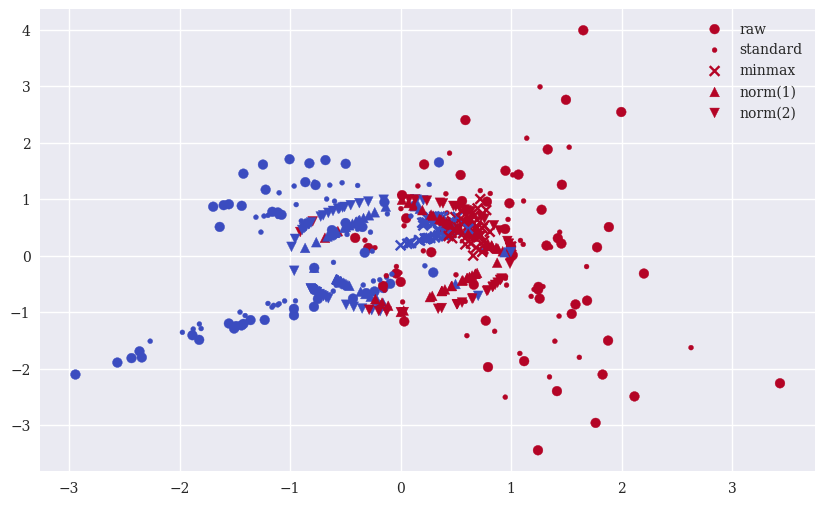

In [199]:
plt.figure(figsize=(10, 6))
markers = ['o', '.', 'x', '^', 'v']
data_sets = [X, Xs, Xm, Xn1, Xn2]
labels = ['raw', 'standard', 'minmax', 'norm(1)', 'norm(2)']
for x, m, l in zip(data_sets, markers, labels):
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y,
            marker=m, cmap='coolwarm', label=l)
plt.legend();

Figure 13-30. Raw and transformed data in comparison


In [200]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [201]:
Xb = preprocessing.Binarizer().fit_transform(X)  
Xb[:5]

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.]])

In [202]:
2 ** 2  

4

In [203]:
Xd = np.digitize(X, bins=[-1, 0, 1])  
Xd[:5]

array([[3, 1],
       [1, 1],
       [0, 0],
       [3, 0],
       [2, 2]])

In [204]:
4 ** 2  

16

In [205]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [206]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33,
                                                    random_state=0)

In [207]:
model = SVC(C=1, kernel='linear')

In [208]:
model.fit(train_x, train_y)  

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [209]:
pred_train = model.predict(train_x)  

In [210]:
accuracy_score(train_y, pred_train)  

0.9402985074626866

In [211]:
pred_test = model.predict(test_x)  

In [212]:
test_y == pred_test  

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [213]:
accuracy_score(test_y, pred_test)  

0.7878787878787878

In [214]:
test_c = test_x[test_y == pred_test]
test_f = test_x[test_y != pred_test]

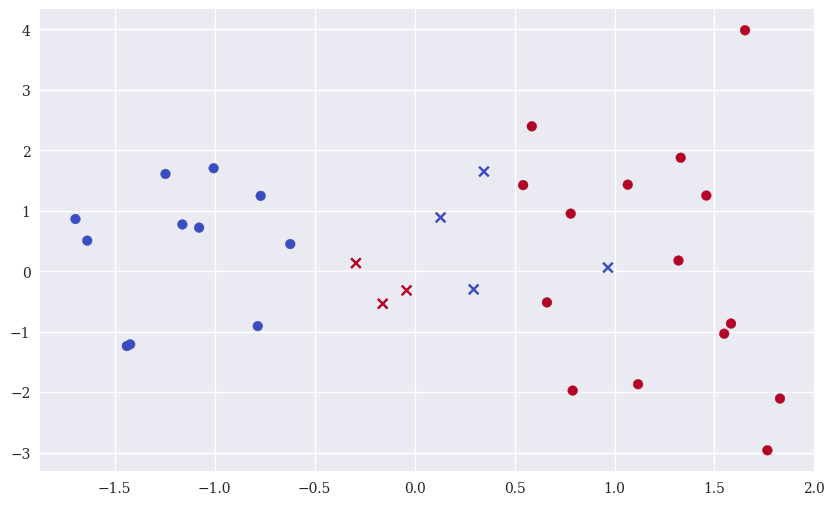

In [215]:
plt.figure(figsize=(10, 6))
plt.scatter(x=test_c[:, 0], y=test_c[:, 1], c=test_y[test_y == pred_test],
            marker='o', cmap='coolwarm')
plt.scatter(x=test_f[:, 0], y=test_f[:, 1], c=test_y[test_y != pred_test],
            marker='x', cmap='coolwarm');